#Introdução

E um estudo de caso de dois datasets, um contém amostras de vinho tinto e outro amostras de vinho branco.

Cada amostra de vinho vem com um parametro de classificação de qualidade baseada nas variáveis de entrada.

Informação dos Atributos

Variáveis de entrada :

1.   fixed acidity
2.   volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)
13. color (essa variável categórica foi adicionada com junção dos dois datasets)

Referência: https://archive.ics.uci.edu/dataset/186/wine+quality

Baseado no dataset gotaria de responder a uma pergunta com a analise exploratória dos dados.

Um determinado tipo de vinho (tinto ou branco) está associado a uma qualidade superior?


# Importação dos pacotes



In [91]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
## Criação de modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pickle import dump
from pickle import load


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


#Carga do Dataset

In [92]:
# Carregar os dois arquivos CSV com delimitador ';'
vinho_vermelho = pd.read_csv(
    'https://raw.githubusercontent.com/TerezaAlimos/Analise-explorat-ria-e-pr-processamento/'
    'refs/heads/main/winequality-red.csv', delimiter=';')
vinho_branco = pd.read_csv(
    'https://raw.githubusercontent.com/TerezaAlimos/Analise-explorat-ria-e-pr-processamento/'
    'refs/heads/main/winequality-white.csv', delimiter=';')

# Adicionar uma coluna 'color' para identificar o tipo de vinho
vinho_vermelho['color'] = 'red'
vinho_branco['color'] = 'white'

# Concatenar os DataFrames
vinho_concatenado = pd.concat([vinho_vermelho, vinho_branco])

# Salvar o resultado em um novo arquivo CSV com delimitador ';'
vinho_concatenado.to_csv('arquivo_concatenado.csv', index=False, sep=';')

# Lê o arquivo concatenado com o delimitador ';'
vinho_dataset = pd.read_csv('arquivo_concatenado.csv', delimiter=';')

# Verificando o tipo do dataset
type(vinho_dataset)



pandas.core.frame.DataFrame

#Análise Exploratória

In [93]:
# Exibindo as primeiras linhas
vinho_dataset.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red


In [94]:
# Exibindo as ultimas linhas
vinho_dataset.tail(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6489,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white
6490,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white
6491,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [96]:
# Exibindo o nome das colunas
vinho_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [97]:
# Exibindo as dimensões do dataset
vinho_dataset.shape

(6497, 13)

In [98]:
# Mostra as informações do dataset
vinho_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [99]:
# Exibindo sumário estatístico
vinho_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [100]:
# Verifica a distribuição das classes
vinho_dataset.groupby('color').size()

,0
color,
red,1599
white,4898


In [101]:
# Remover a coluna 'color' para calcular a correlação apenas em colunas numéricas
vinho_dataset_numerico = vinho_dataset.drop(columns=['color'])

# Correlação de Pearson nas colunas numéricas
correlacao = vinho_dataset_numerico.corr(method='pearson')

# Exibindo a matriz de correlação
correlacao

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [112]:
# Encontre a qualidade média de cada tipo de vinho (tinto e branco) com groupby
vinho_dataset.groupby('color')['quality'].mean()

,quality
color,
red,5.636023
white,5.877909


In [113]:
# Repetindo qualidade média de cada tipo de vinho (tinto e branco) após a remoção de duplicatas
vinho_dataset_sem_duplicatas.groupby('color')['quality'].mean()

,quality
color,
red,5.623252
white,5.854835


**Resposta:**

Pudemos perceber que o vinho branco está associado a uma média de qualidade superiror ao vinho tinto.

#Visualizações

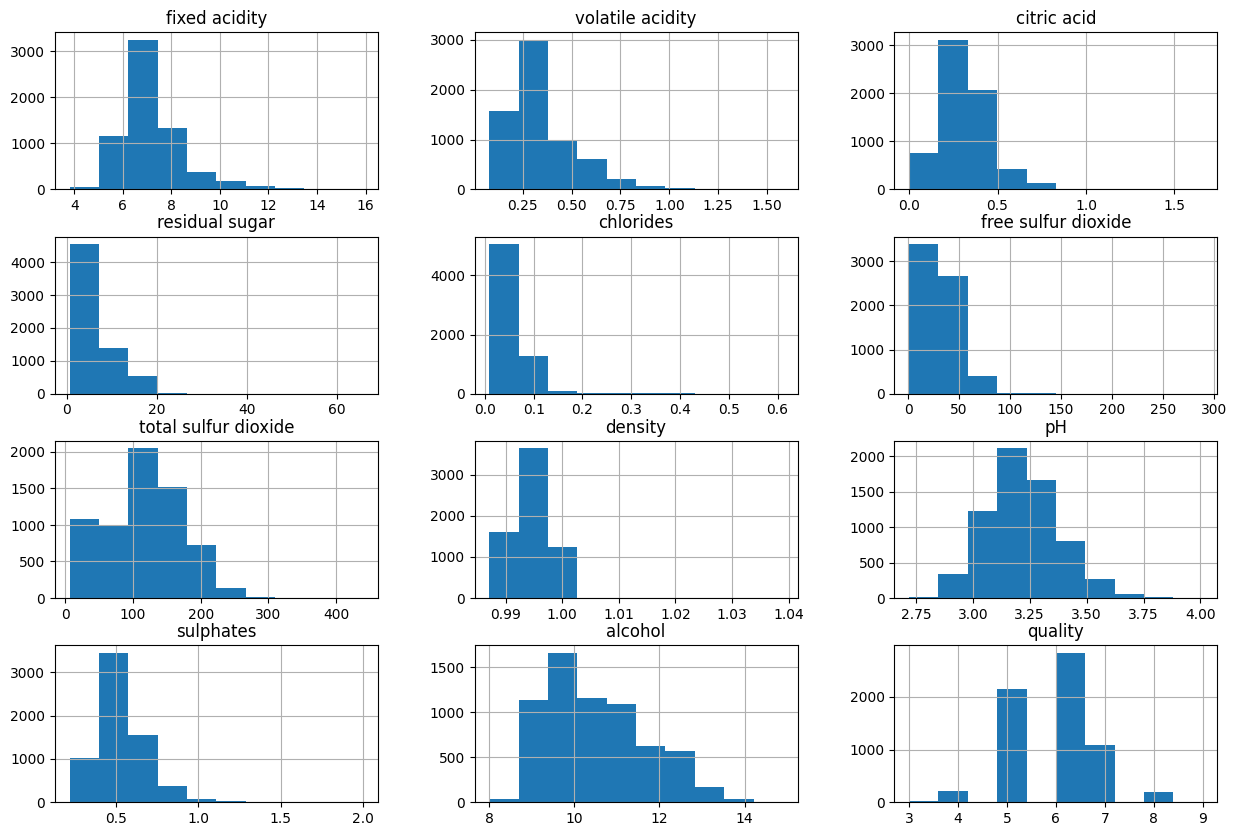

In [102]:
# Histograma
vinho_dataset.hist(figsize = (15,10))
plt.show()

In [18]:
# pair plot com Seaborn
sns.pairplot(vinho_dataset, hue = "color");

Output hidden; open in https://colab.research.google.com to view.

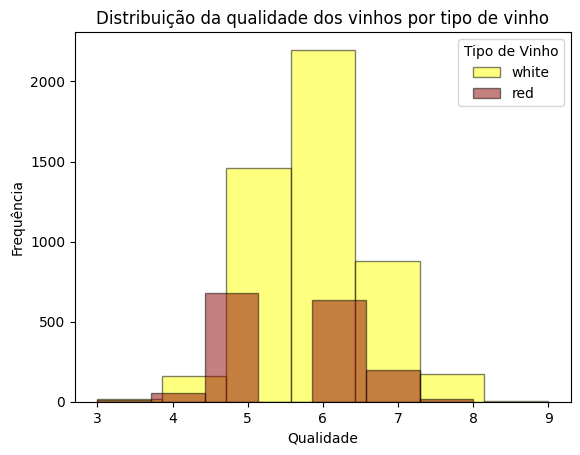

In [84]:
# Histograma de qualidade por tipo de vinho
colors = {'red': 'darkred', 'white': 'yellow'}
plt.hist(vinho_dataset[vinho_dataset['color'] == 'white']['quality'],
         bins=7, edgecolor='black', color=colors['white'], alpha=0.5, label='white')
plt.hist(vinho_dataset[vinho_dataset['color'] == 'red']['quality'],
         bins=7, edgecolor='black', color=colors['red'], alpha=0.5, label='red')
plt.title('Distribuição da qualidade dos vinhos por tipo de vinho')
plt.ylabel('Frequência')
plt.xlabel('Qualidade')
plt.legend(title='Tipo de Vinho')
plt.show()

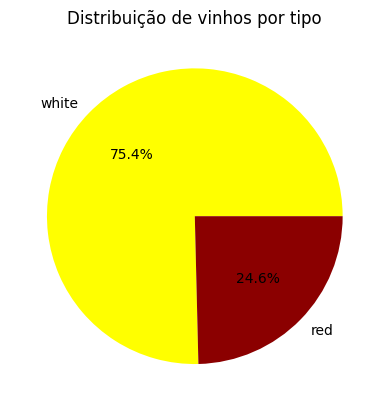

In [85]:
# Gráfico de pizza
quantidade = vinho_dataset['color'].value_counts()
colors = ['yellow', 'darkred']
plt.pie(quantidade, labels=quantidade.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribuição de vinhos por tipo')
plt.show()

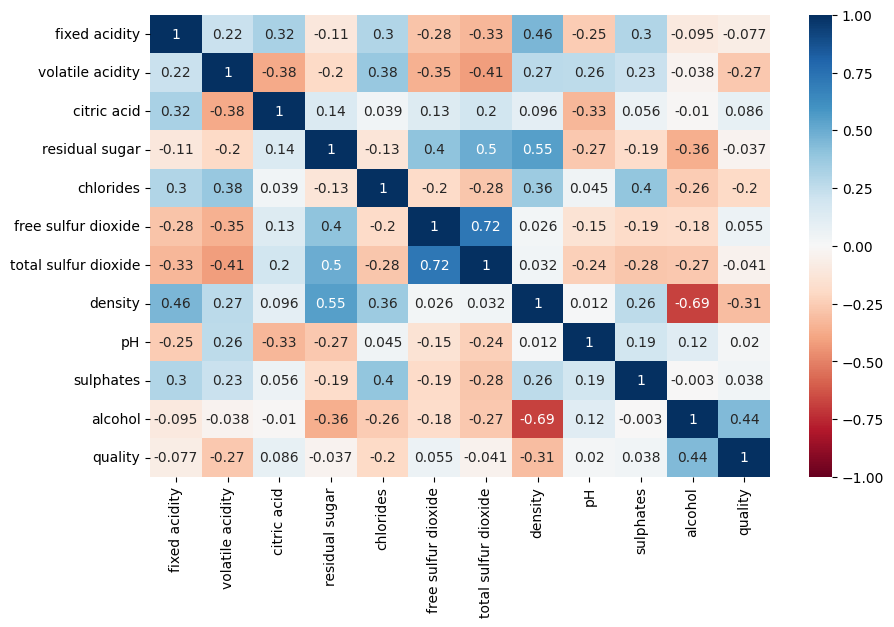

In [21]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(vinho_dataset_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [86]:
# Geração do relatório
profile = ProfileReport(vinho_dataset, title='Pandas Profiling Report', html={'style': {'full_width': False}})
profile.to_notebook_iframe()


Output hidden; open in https://colab.research.google.com to view.

#Pré-processamento de dados

In [45]:
# Verificando nulls no dataset
vinho_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [103]:
# Verificando duplicatas no dataset
tem_duplicatas = vinho_dataset.duplicated().any()
print(f"Existem duplicatas no dataset? {tem_duplicatas}")

# Contar o número de duplicatas no dataset
numero_duplicatas = vinho_dataset.duplicated().sum()
print(f"Número de duplicatas no dataset: {numero_duplicatas}")

# Exibir as linhas duplicadas
duplicatas = vinho_dataset[vinho_dataset.duplicated(keep=False)]
print("Linhas duplicadas no dataset:")
print(duplicatas)

Existem duplicatas no dataset? True
Número de duplicatas no dataset: 1177
Linhas duplicadas no dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
22              7.9              0.43         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
6450            6.4              0.33         0.44             8.9      0.055   
6454            7.1              0.23         0.39            13.7      0.058   
6455            7.1              0.23         0.39            13.7      0.058   
6478            6.6              0.34         0.40             8.1      0.046   
6479 

In [104]:
# salvando um novo dataset para tratamento de duplicatas
dataset_sem_duplicatas = vinho_dataset.copy()

# Remover duplicatas do dataset
vinho_dataset_sem_duplicatas = dataset_sem_duplicatas.drop_duplicates()

tem_duplicatas = vinho_dataset_sem_duplicatas.duplicated().any()
print(f"Existem duplicatas no dataset? {tem_duplicatas}")

Existem duplicatas no dataset? False


In [80]:
# Transformação categórica
# Cópia do dataset para transformação categórica
vinho_encoder = vinho_dataset_sem_duplicatas.copy()

# Identificando as colunas categóricas
categorical_cols = ['color']  # Colunas categóricas que você deseja codificar

# Definindo o transformador como one hot encoding com sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Transformando apenas as colunas categóricas
onehot = encoder.fit_transform(vinho_encoder[categorical_cols])

# Convertendo o resultado para um DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenando o DataFrame original (sem as colunas categóricas) com o DataFrame one-hot
vinho_dataset_encoded = pd.concat([vinho_encoder.drop(columns=categorical_cols).reset_index(drop=True),
                                   onehot_df.reset_index(drop=True)], axis=1)

# Exibindo o novo DataFrame com as colunas codificadas
print(vinho_dataset_encoded.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  color_red  color_white  
0      9.4        5        1.0          

#Modelo de Machine Learning

In [108]:
# Separar as variáveis independentes (X) da variável dependente (Y)
X = vinho_dataset_sem_duplicatas.drop(columns=['color' , 'quality'])
Y = vinho_dataset_sem_duplicatas['quality']  # A variável que queremos prever

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [109]:
#Criar o modelo
modelo = RandomForestClassifier(random_state=42)

# Treinar o modelo
modelo.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = modelo.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.56


In [110]:
# Matriz de confusão
confusion = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusão:')
print(confusion)

# Relatório de classificação
report = classification_report(Y_test, Y_pred)
print('Relatório de Classificação:')
print(report)

Matriz de Confusão:
[[  0   0   2   4   0   0   0]
 [  0   7  28  34   2   0   0]
 [  0   3 367 219   3   0   0]
 [  0   0 176 512  54   0   0]
 [  0   0   5 195 101   3   0]
 [  0   0   1  22  14   2   0]
 [  0   0   0   1   1   0   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.10      0.17        71
           5       0.63      0.62      0.63       592
           6       0.52      0.69      0.59       742
           7       0.58      0.33      0.42       304
           8       0.40      0.05      0.09        39
           9       0.00      0.00      0.00         2

    accuracy                           0.56      1756
   macro avg       0.40      0.26      0.27      1756
weighted avg       0.57      0.56      0.54      1756



In [66]:
# Salva o modelo no disco
vinho_filename = 'model.pkl'
dump(modelo, open(vinho_filename, 'wb'))

In [81]:
# Carregar o modelo salvo
modelo_carregado = load(open('model.pkl', 'rb'))

# Fazer previsões com o modelo carregado
Y_pred_carregado = modelo_carregado.predict(X_test)